In [1]:
import pandas as pd

result_1 = pd.read_csv(r"D:\worldcup\result_top8.csv", encoding='gbk')
result_2 = pd.read_csv(r"D:\worldcup\result_top4.csv", encoding='gbk')
result_3 = pd.read_csv(r"D:\worldcup\result.csv", encoding='gbk')
result_4 = pd.read_csv(r"D:\worldcup\result_top2.csv", encoding='gbk')
result_5 = pd.read_csv(r"D:\worldcup\result_top1.csv", encoding='gbk')
result_pro = pd.concat([result_1,result_2,result_3,result_4,result_5])

result_pro['competition_time'] = pd.to_datetime(result_pro['competition_time'])
result_pro = result_pro.reset_index(drop=True)

result_pro['主客'] = result_pro['team1'].str.cat(result_pro['team2'], sep=',')

result_pro = result_pro.drop(['team1','team2'], axis=1).reset_index(drop=True)
result_pro.head()

,competition_time,净胜球,主客
0,2018-06-30 22:00:00,0.405893,"法国,阿根廷"
1,2018-07-01 02:00:00,-0.408475,"乌拉圭,葡萄牙"
2,2018-07-01 22:00:00,0.660441,"西班牙,俄罗斯"
3,2018-07-02 02:00:00,-0.044530,"克罗地亚,丹麦"
4,2018-07-02 22:00:00,0.487959,"巴西,墨西哥"


In [2]:
import re

result_group = pd.read_csv(r"D:\worldcup\world_cup.csv", encoding='gbk')
result_group['时间'] = pd.to_datetime(result_group['时间'])
result_group['主'] = [float(re.search(r'^[1-9]\d*\.\d*|0\.\d*[1-9]\d*$', x).group()) for x in result_group['主']]
result_group['和'] = [float(re.search(r'^[1-9]\d*\.\d*|0\.\d*[1-9]\d*$', x).group()) for x in result_group['和']]
result_group['客'] = [float(re.search(r'^[1-9]\d*\.\d*|0\.\d*[1-9]\d*$', x).group()) for x in result_group['客']]
result_group['真实净胜球'] = [float(x.split(':')[0])-float(x.split(':')[1]) for x in result_group['比分']]
result_group['主客'] = result_group['主队'].str.cat(result_group['客队'], sep=',')
result_group.head()

,赛事,时间,主队,主,和,客,客队,比分,真实净胜球,主客
0,世界杯分,2018-06-29 02:00:00,英格兰,2.551,2.936,3.273,比利时,0:01,-1.0,"英格兰,比利时"
1,世界杯分,2018-06-29 02:00:00,巴拿马,4.170,3.577,1.923,突尼斯,1:02,-1.0,"巴拿马,突尼斯"
2,世界杯分,2018-06-28 22:00:00,塞内加尔,4.710,3.607,1.809,哥伦比亚,0:01,-1.0,"塞内加尔,哥伦比亚"
3,世界杯分,2018-06-28 22:00:00,日本,3.062,3.165,2.577,波兰,0:01,-1.0,"日本,波兰"
4,世界杯分,2018-06-28 02:00:00,瑞士,1.629,3.597,6.872,哥斯达黎加,2:02,0.0,"瑞士,哥斯达黎加"


In [3]:
result_all = pd.merge(result_pro, result_group, on = '主客')
result_all.head()

,competition_time,净胜球,主客,赛事,时间,主队,主,和,客,客队,比分,真实净胜球
0,2018-06-30 22:00:00,0.405893,"法国,阿根廷",世界杯1,2018-06-30 22:00:00,法国,2.405,3.076,3.358,阿根廷,4:03,1.0
1,2018-07-01 02:00:00,-0.408475,"乌拉圭,葡萄牙",世界杯1,2018-07-01 02:00:00,乌拉圭,2.981,2.936,2.771,葡萄牙,2:01,1.0
2,2018-07-01 22:00:00,0.660441,"西班牙,俄罗斯",世界杯1,2018-07-01 22:00:00,西班牙,1.582,4.035,6.342,俄罗斯,1:01,0.0
3,2018-07-02 02:00:00,-0.044530,"克罗地亚,丹麦",世界杯1,2018-07-02 02:00:00,克罗地亚,1.945,3.216,4.721,丹麦,1:01,0.0
4,2018-07-02 22:00:00,0.487959,"巴西,墨西哥",世界杯1,2018-07-02 22:00:00,巴西,1.482,4.354,7.427,墨西哥,2:00,2.0


相关系数： [[ 1.          0.50314338]
 [ 0.50314338  1.        ]]


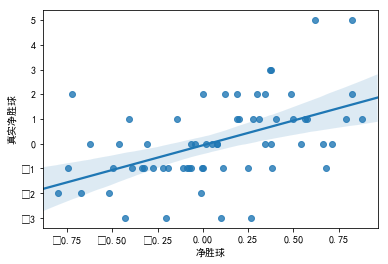

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

plt.rcParams['font.sans-serif']=['SimHei']
sns.regplot(x="净胜球", y="真实净胜球", data=result_all)
np.corrcoef(result_all.loc[:, ["净胜球", "真实净胜球"]],rowvar=0)
print('相关系数：', np.corrcoef(result_all.loc[:, ["净胜球", "真实净胜球"]],rowvar=0))

In [43]:
result_all['money'] = 0
for i in range(len(result_all)):
    if result_all.loc[i, '净胜球'] > 0.1:
        if result_all.loc[i, '真实净胜球'] > 0.0:
            result_all.loc[i, 'money'] = result_all.loc[i, '主']
    elif result_all.loc[i, '净胜球'] < -0.1:
        if result_all.loc[i, '真实净胜球'] < 0.0:
            result_all.loc[i, 'money'] = result_all.loc[i, '客']
    else:
        if result_all.loc[i, '真实净胜球'] == 0:
            result_all.loc[i, 'money'] = result_all.loc[i, '和']
result_all = result_all.fillna(0)
result_all.head()

,competition_time,净胜球,主客,赛事,时间,主队,主,和,客,客队,比分,真实净胜球,money
0,2018-06-14 23:00:00,0.824845,"俄罗斯,沙特阿拉伯",世界杯分,2018-06-14 23:00:00,俄罗斯,1.421,4.331,9.181,沙特阿拉伯,5:00,5.0,1.421
1,2018-06-15 20:00:00,-0.275923,"埃及,乌拉圭",世界杯分,2018-06-15 20:00:00,埃及,6.833,3.776,1.578,乌拉圭,0:01,-1.0,1.578
2,2018-06-15 23:00:00,-0.107328,"摩洛哥,伊朗",世界杯分,2018-06-15 23:00:00,摩洛哥,2.248,2.978,3.726,伊朗,0:01,-1.0,3.726
3,2018-06-16 02:00:00,-0.464226,"葡萄牙,西班牙",世界杯分,2018-06-16 02:00:00,葡萄牙,4.076,3.261,2.006,西班牙,3:03,0.0,0.000
4,2018-06-16 18:00:00,0.880400,"法国,澳大利亚",世界杯分,2018-06-16 18:00:00,法国,1.239,6.296,12.130,澳大利亚,2:01,1.0,1.239


In [44]:
a = [1 for x in result_all['money'] if x>0]
print('准确率：',sum(a)/len(result_all))

准确率： 0.625


### 按照单场投资的方法

In [38]:
result_all = result_all.sort_values('competition_time').reset_index(drop=True)
rate = np.mean(result_all['money'])
print('你能赚多少：',rate)
print('利率：',(rate-1))

你能赚多少： 1.34171875
利率： 0.34171875000000007


### 按照同时投2场的方法

In [39]:
list_ = []
for i in range(len(result_all)-1):
    tmp = result_all.loc[i, 'money'] * result_all.loc[i+1, 'money']
    list_.append(tmp)
print("2串1：",np.mean(list_))
print('利率：',(np.mean(list_)-1))

2串1： 1.71545195238
利率： 0.715451952381


### 混淆矩阵

Text(35,0.5,'pro')

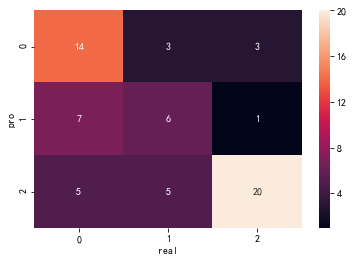

In [40]:
def fun(x):
    if x > 0.1:
        return 1
    elif x < -0.1:
        return -1
    else:
        return 0
    
p = [fun(x) for x in result_all['净胜球']]
y = [fun(x) for x in result_all['真实净胜球']]

from sklearn.metrics import confusion_matrix
mat =  confusion_matrix(y, p)
sns.heatmap(mat.T, annot=True, fmt='d')
plt.xlabel('real')
plt.ylabel('pro')